In [1]:
import pandas as pd
import numpy as np
import torch
from collections import Counter
!pip install gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv("/content/drive/MyDrive/PHOTOS FOR PPT/finalv3.csv")

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


In [5]:
data.head(10)

,Complaint Text,Category
0,Wi-Fi connectivity was poor throughout the stay.,Technical Issue
1,Elevator at Marriott was stuck for several min...,Service Delay
2,Insufficient staff at the front desk.,Customer Service Issue
3,Taxi service arranged by the hotel overcharged...,Billing Issue
4,Staff behavior was rude and unprofessional.,Customer Service Issue
5,The lounge was overcrowded and unclean.,Room Cleanliness
6,The elevators were malfunctioning frequently.,Facility Unavailable
7,Billing amount at Marriott was incorrect at ch...,Billing Issue
8,The lounge was overcrowded and unclean.,Room Cleanliness
9,Restaurant order was served cold.,Food Quality Issue


In [6]:
testing_categories= data["Complaint Text"].unique()
data.shape

(21129, 2)

In [7]:
data["Category"].unique()


array(['Technical Issue', 'Service Delay', 'Customer Service Issue',
       'Billing Issue', 'Room Cleanliness', 'Facility Unavailable',
       'Food Quality Issue', 'Booking Issue', 'Facility Issue',
       'Room Facility Issue', 'Service Issue'], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21129 entries, 0 to 21128
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Complaint Text  21129 non-null  object
 1   Category        21129 non-null  object
dtypes: object(2)
memory usage: 330.3+ KB


In [9]:
data["Category"].value_counts()

,count
Category,
Customer Service Issue,2090
Booking Issue,2087
Service Delay,2078
Room Cleanliness,2056
Billing Issue,2054
Facility Unavailable,2028
Facility Issue,1774
Food Quality Issue,1764
Service Issue,1734


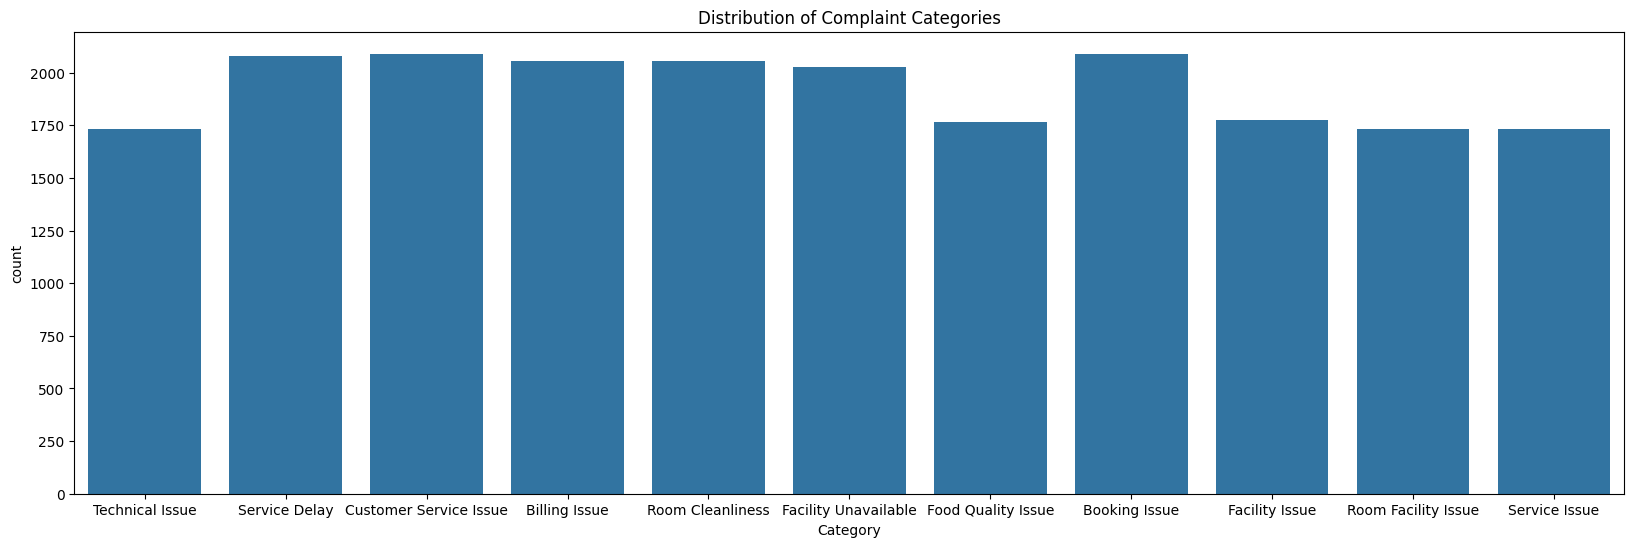

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.countplot(data=data, x='Category')
plt.title('Distribution of Complaint Categories')
plt.show()

<Axes: xlabel='length', ylabel='Count'>

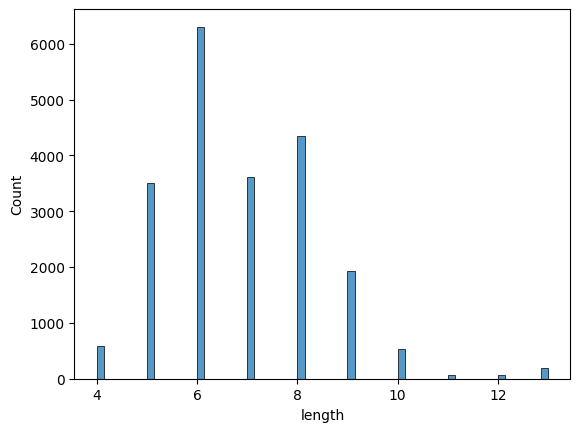

In [11]:
data["length"] = data["Complaint Text"].apply(lambda x: len(x.split()))
sns.histplot(data["length"])

In [12]:
#text cleaning
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
lemmatizer=WordNetLemmatizer()
nltk.download("stopwords")
stopwords=stopwords.words("english")
data["lower"]=data["Complaint Text"].apply(lambda x: x.lower())
data["punct_removed"] =data["lower"].apply(lambda x: re.sub(r'[^\w\s]' , '' , x))
data["stopword_removed"]=data["punct_removed"].apply(lambda x : " ".join([i for i in x.split() if i not in stopwords]))
data["Lemmatized"]=data["stopword_removed"].apply(lambda x:" ".join([lemmatizer.lemmatize(i) for i in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
data.head(10)

,Complaint Text,Category,length,lower,punct_removed,stopword_removed,Lemmatized
0,Wi-Fi connectivity was poor throughout the stay.,Technical Issue,7,wi-fi connectivity was poor throughout the stay.,wifi connectivity was poor throughout the stay,wifi connectivity poor throughout stay,wifi connectivity poor throughout stay
1,Elevator at Marriott was stuck for several min...,Service Delay,8,elevator at marriott was stuck for several min...,elevator at marriott was stuck for several min...,elevator marriott stuck several minutes,elevator marriott stuck several minute
2,Insufficient staff at the front desk.,Customer Service Issue,6,insufficient staff at the front desk.,insufficient staff at the front desk,insufficient staff front desk,insufficient staff front desk
3,Taxi service arranged by the hotel overcharged...,Billing Issue,8,taxi service arranged by the hotel overcharged...,taxi service arranged by the hotel overcharged me,taxi service arranged hotel overcharged,taxi service arranged hotel overcharged
4,Staff behavior was rude and unprofessional.,Customer Service Issue,6,staff behavior was rude and unprofessional.,staff behavior was rude and unprofessional,staff behavior rude unprofessional,staff behavior rude unprofessional
5,The lounge was overcrowded and unclean.,Room Cleanliness,6,the lounge was overcrowded and unclean.,the lounge was overcrowded and unclean,lounge overcrowded unclean,lounge overcrowded unclean
6,The elevators were malfunctioning frequently.,Facility Unavailable,5,the elevators were malfunctioning frequently.,the elevators were malfunctioning frequently,elevators malfunctioning frequently,elevator malfunctioning frequently
7,Billing amount at Marriott was incorrect at ch...,Billing Issue,8,billing amount at marriott was incorrect at ch...,billing amount at marriott was incorrect at ch...,billing amount marriott incorrect checkout,billing amount marriott incorrect checkout
8,The lounge was overcrowded and unclean.,Room Cleanliness,6,the lounge was overcrowded and unclean.,the lounge was overcrowded and unclean,lounge overcrowded unclean,lounge overcrowded unclean
9,Restaurant order was served cold.,Food Quality Issue,5,restaurant order was served cold.,restaurant order was served cold,restaurant order served cold,restaurant order served cold


In [14]:
data.shape

(21129, 7)

In [15]:
df=pd.DataFrame(pd.Series(data["Lemmatized"]))
df["Category"] = data["Category"]
X=df["Lemmatized"]
Y=df["Category"]
X_seq=data["lower"]


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# x_seqTrain,x_seqTest,y_seqTrain,y_seqTest=train_test_split(X_seq,Y,test_size=0.2,random_state=42)

In [17]:
print("X_train shape =",x_train.shape)
print("X_test shape =",x_test.shape)
print("Y_train shape =",y_train.shape)
print("Y_test shape =",y_test.shape)


X_train shape = (16903,)
X_test shape = (4226,)
Y_train shape = (16903,)
Y_test shape = (4226,)


In [18]:
x_train

,Lemmatized
17430,lounge overcrowded unclean
9731,credit card machine working checkout
3984,thermostat room working properly
9427,strong unpleasant odor hallway
5836,swimming pool operational
...,...
11284,checkout process excessively slow
11964,taxi service arranged hotel overcharged
5390,swimming pool operational
860,wifi connectivity poor throughout stay


In [19]:
x_train_tokenized = [text.split() for text in x_train]
x_train_tokenized[:5]

[['lounge', 'overcrowded', 'unclean'],
 ['credit', 'card', 'machine', 'working', 'checkout'],
 ['thermostat', 'room', 'working', 'properly'],
 ['strong', 'unpleasant', 'odor', 'hallway'],
 ['swimming', 'pool', 'operational']]

In [20]:
VECTOR_SIZE = 100

word2vec_model = Word2Vec(
    sentences=x_train_tokenized,
    vector_size=VECTOR_SIZE,
    window=5,
    min_count=1,
    epochs=10
)

In [21]:
word2vec_model.wv.most_similar("room")

[('tv', 0.4528765380382538),
 ('channel', 0.42345181107521057),
 ('frequently', 0.4034137427806854),
 ('delivery', 0.3697167932987213),
 ('thermostat', 0.36803942918777466),
 ('television', 0.3650071620941162),
 ('properly', 0.3629949986934662),
 ('knocking', 0.35779905319213867),
 ('laundry', 0.3515174090862274),
 ('multiple', 0.34677499532699585)]

In [22]:
air=word2vec_model.wv["air"]
print(air.shape)

(100,)


In [23]:
#to get the features into a fixed dimension say 100
def average_word_vectors_pretrained(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    nwords = 0

    for word in words:

        word = word.lower()
        if word in model:
            nwords = nwords + 1
            feature_vector = np.add(feature_vector, model[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

In [24]:
EMBEDDING_DIM = 100
X_train_embeddings = np.array([average_word_vectors_pretrained(text.split(), word2vec_model.wv, EMBEDDING_DIM) for text in x_train])
X_test_embeddings = np.array([average_word_vectors_pretrained(text.split(), word2vec_model.wv, EMBEDDING_DIM) for text in x_test])

In [25]:
X_train_embeddings.shape

(16903, 100)

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# y_seqTrain_encoded = label_encoder.fit_transform(y_seqTrain)
# y_seqTest_encoded = label_encoder.transform(y_seqTest)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)
unique_categories = label_encoder.classes_

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
class SimpleEmbeddingDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.tensor(embeddings, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.embeddings)
    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

In [28]:
train_dataset = SimpleEmbeddingDataset(X_train_embeddings, y_train_encoded)
test_dataset = SimpleEmbeddingDataset(X_test_embeddings, y_test_encoded)

In [29]:
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [30]:
class FeedForwardClassifier(nn.Module):
  def __init__(self,input_dim , hidden_1_dim , hidden_2_dim , num_classes):
    super().__init__()
    self.fc1=nn.Linear(input_dim,hidden_1_dim)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(hidden_1_dim,hidden_2_dim)
    self.fc3=nn.Linear(hidden_2_dim,num_classes)
  def forward(self,x):
    out=self.fc1(x)
    out=self.relu(out)
    out=self.fc2(out)
    out=self.relu(out)
    out=self.fc3(out)
    return out

In [31]:
model = FeedForwardClassifier(
    input_dim=EMBEDDING_DIM,
    hidden_1_dim=128,
    hidden_2_dim=64,
    num_classes=num_classes
).to(device)

In [32]:
from sklearn.utils import class_weight
class_weights_np = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_tensor = torch.tensor(class_weights_np, dtype=torch.float)

In [33]:
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
N_EPOCHS=20
def train_model(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    for embeddings, labels in loader:

        embeddings, labels = embeddings.to(device), labels.to(device)

        optimizer.zero_grad()
        predictions = model(embeddings)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(predictions, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)


    avg_loss = total_loss / len(loader)
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy


def evaluate_model(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for embeddings, labels in loader:

            embeddings, labels = embeddings.to(device), labels.to(device)

            predictions = model(embeddings)
            loss = criterion(predictions, labels)

            total_loss += loss.item()
            _, predicted = torch.max(predictions, 1)

            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(loader)
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy, np.array(all_preds), np.array(all_labels)


best_val_loss = float('inf')



from sklearn.metrics import classification_report, confusion_matrix


print("\nStarting Training for Baseline Model...")
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_model(model, train_loader, optimizer, criterion)
    val_loss, val_acc, _, _ = evaluate_model(model, test_loader, criterion)

    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {val_loss:.4f} | Val. Acc: {val_acc*100:.2f}%')


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'baseline_ffnn_model.pt')
        print(f"  --> Saved best model at Epoch {epoch+1}")

print("\nEvaluating Baseline Model on Test Set...")
model.load_state_dict(torch.load('baseline_ffnn_model.pt'))
test_loss, test_acc, test_preds, test_labels = evaluate_model(model, test_loader, criterion)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%')

print("\nClassification Report on Test Set:")

print(classification_report(test_labels, test_preds, target_names=unique_categories, zero_division=0))

print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(test_labels, test_preds))


Starting Training for Baseline Model...
Epoch: 01 | Train Loss: 0.9051 | Train Acc: 81.84% | Val. Loss: 0.6519 | Val. Acc: 89.07%
  --> Saved best model at Epoch 1
Epoch: 02 | Train Loss: 0.6297 | Train Acc: 89.06% | Val. Loss: 0.6114 | Val. Acc: 89.73%
  --> Saved best model at Epoch 2
Epoch: 03 | Train Loss: 0.6022 | Train Acc: 89.60% | Val. Loss: 0.5857 | Val. Acc: 89.92%
  --> Saved best model at Epoch 3
Epoch: 04 | Train Loss: 0.5887 | Train Acc: 89.84% | Val. Loss: 0.5802 | Val. Acc: 89.92%
  --> Saved best model at Epoch 4
Epoch: 05 | Train Loss: 0.5816 | Train Acc: 89.89% | Val. Loss: 0.5788 | Val. Acc: 89.92%
  --> Saved best model at Epoch 5
Epoch: 06 | Train Loss: 0.5750 | Train Acc: 89.90% | Val. Loss: 0.5760 | Val. Acc: 89.92%
  --> Saved best model at Epoch 6
Epoch: 07 | Train Loss: 0.5736 | Train Acc: 89.90% | Val. Loss: 0.5776 | Val. Acc: 89.92%
Epoch: 08 | Train Loss: 0.5717 | Train Acc: 89.90% | Val. Loss: 0.5705 | Val. Acc: 89.92%
  --> Saved best model at Epoch 8
E

### RNN


In [35]:
def text_to_indices(text_list, vocab, unk_idx, max_seq_len, pad_idx):
    indexed_sequences = []
    for text in text_list:
        tokens = text.split()
        indices = [vocab.get(token, unk_idx) for token in tokens]

        if len(indices) < max_seq_len:
            indices.extend([pad_idx] * (max_seq_len - len(indices)))
        elif len(indices) > max_seq_len:
            indices = indices[:max_seq_len]

        indexed_sequences.append(indices)
    return np.array(indexed_sequences)

In [36]:
class TextDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]


In [37]:

class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, n_layers, bidirectional, dropout_rate, pad_idx, pretrained_embedding_matrix):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.embedding.weight.data.copy_(pretrained_embedding_matrix)
        self.rnn = nn.RNN(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate if n_layers > 1 else 0,
            batch_first=True,
            nonlinearity='tanh'
        )

        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        output, hidden = self.rnn(embedded)

        if self.rnn.bidirectional:
            hidden_combined = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden_combined = self.dropout(hidden[-1,:,:])

        prediction = self.fc(hidden_combined)
        return prediction

In [38]:
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT_RATE = 0.5
N_EPOCHS = 20
BATCH_SIZE = 32
MAX_SEQUENCE_LENGTH = 200
LEARNING_RATE = 0.001

word_counts = Counter()
for text in x_train:
    word_counts.update(text.split())

vocab = {'<pad>': 0, '<unk>': 1}
for word, count in word_counts.most_common():
    if word not in vocab:
        vocab[word] = len(vocab)

VOCAB_SIZE = len(vocab)
PAD_IDX = vocab['<pad>']
UNK_IDX = vocab['<unk>']

print(f"\nBuilt vocabulary for RNN. Total words in vocab: {VOCAB_SIZE}")
print(f"Pad index: {PAD_IDX}, Unknown index: {UNK_IDX}")

embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM), dtype=np.float32)

for word, idx in vocab.items():
    if word == '<pad>':
        embedding_matrix[idx] = np.zeros(EMBEDDING_DIM)
    elif word == '<unk>':
        embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, EMBEDDING_DIM)
    else:
        word_lower = word.lower()

        if word_lower in word2vec_model.wv:
            embedding_matrix[idx] = word2vec_model.wv[word_lower]
        else:
            embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, EMBEDDING_DIM)

embedding_matrix = torch.from_numpy(embedding_matrix)

X_train_indices = text_to_indices(x_train, vocab, UNK_IDX, MAX_SEQUENCE_LENGTH, PAD_IDX)
X_test_indices = text_to_indices(x_test, vocab, UNK_IDX, MAX_SEQUENCE_LENGTH, PAD_IDX)


train_dataset_rnn = TextDataset(X_train_indices, y_train_encoded)
test_dataset_rnn = TextDataset(X_test_indices, y_test_encoded)

train_loader_rnn = DataLoader(train_dataset_rnn, batch_size=BATCH_SIZE, shuffle=True)
test_loader_rnn = DataLoader(test_dataset_rnn, batch_size=BATCH_SIZE, shuffle=False)




Built vocabulary for RNN. Total words in vocab: 191
Pad index: 0, Unknown index: 1


In [39]:
model_rnn = RNNClassifier(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    num_classes=num_classes,
    n_layers=N_LAYERS,
    bidirectional=BIDIRECTIONAL,
    dropout_rate=DROPOUT_RATE,
    pad_idx=PAD_IDX,
    pretrained_embedding_matrix=embedding_matrix
).to(device)

print(model_rnn)



class_weights_np = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_tensor = torch.tensor(class_weights_np, dtype=torch.float).to(device)

criterion_rnn = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer_rnn = optim.Adam(model_rnn.parameters(), lr=LEARNING_RATE)


RNNClassifier(
  (embedding): Embedding(191, 100, padding_idx=0)
  (rnn): RNN(100, 256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=11, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [40]:

def train_model(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    for sequences, labels in loader:
        sequences, labels = sequences.to(device), labels.to(device)
        optimizer.zero_grad()
        predictions = model(sequences)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(predictions, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    avg_loss = total_loss / len(loader)
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy

def evaluate_model(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for sequences, labels in loader:
            sequences, labels = sequences.to(device), labels.to(device)
            predictions = model(sequences)
            loss = criterion(predictions, labels)
            total_loss += loss.item()
            _, predicted = torch.max(predictions, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    avg_loss = total_loss / len(loader)
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy, np.array(all_preds), np.array(all_labels)

In [41]:
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_model(model_rnn, train_loader_rnn, optimizer_rnn, criterion_rnn, device)

    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}%')

torch.save(model_rnn.state_dict(), 'simple_rnn_pretrained_classifier_model.pt')
print(f"--> Saved final model after {N_EPOCHS} epochs.")

print("\nEvaluating Simple RNN Model with Pre-trained Embeddings on Test Set...")
model_rnn.load_state_dict(torch.load('simple_rnn_pretrained_classifier_model.pt'))
test_loss, test_acc, test_preds, test_labels = evaluate_model(model_rnn, test_loader_rnn, criterion_rnn, device)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%')
print("\nClassification Report on Test Set:")
print(classification_report(test_labels, test_preds, target_names=unique_categories, zero_division=0))
print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(test_labels, test_preds))

Epoch: 01 | Train Loss: 0.8564 | Train Acc: 82.55%
Epoch: 02 | Train Loss: 0.7296 | Train Acc: 86.95%
Epoch: 03 | Train Loss: 0.6917 | Train Acc: 88.09%
Epoch: 04 | Train Loss: 0.6480 | Train Acc: 89.28%
Epoch: 05 | Train Loss: 0.6300 | Train Acc: 89.75%
Epoch: 06 | Train Loss: 0.6335 | Train Acc: 89.62%
Epoch: 07 | Train Loss: 0.6348 | Train Acc: 89.70%
Epoch: 08 | Train Loss: 0.6408 | Train Acc: 89.39%
Epoch: 09 | Train Loss: 0.6285 | Train Acc: 89.75%
Epoch: 10 | Train Loss: 0.6494 | Train Acc: 89.36%
Epoch: 11 | Train Loss: 0.6274 | Train Acc: 89.69%
Epoch: 12 | Train Loss: 0.6255 | Train Acc: 89.82%
Epoch: 13 | Train Loss: 0.6281 | Train Acc: 89.78%
Epoch: 14 | Train Loss: 0.6261 | Train Acc: 89.78%
Epoch: 15 | Train Loss: 0.6296 | Train Acc: 89.79%
Epoch: 16 | Train Loss: 0.6203 | Train Acc: 89.87%
Epoch: 17 | Train Loss: 0.6226 | Train Acc: 89.77%
Epoch: 18 | Train Loss: 0.6244 | Train Acc: 89.84%
Epoch: 19 | Train Loss: 0.6246 | Train Acc: 89.78%
Epoch: 20 | Train Loss: 0.6306 

In [42]:
class LSTMTexTDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = torch.tensor(sequences, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]


In [43]:

class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes, n_layers, bidirectional, dropout_rate, pad_idx):
        super().__init__()


        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_idx)
        self.embedding.weight.data.copy_(embedding_matrix)


        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout_rate if n_layers > 1 else 0,
            batch_first=True
        )


        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, num_classes)


        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, text):

        embedded = self.dropout(self.embedding(text))


        output, (hidden, cell) = self.lstm(embedded)

        if self.lstm.bidirectional:

            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:

            hidden = self.dropout(hidden[-1,:,:])


        prediction = self.fc(hidden)
        return prediction

In [44]:


embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM), dtype=np.float32)

for word, idx in vocab.items():
    if word == '<pad>':

        embedding_matrix[idx] = np.zeros(EMBEDDING_DIM)
    elif word == '<unk>':

        embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, EMBEDDING_DIM)
    elif word in word2vec_model.wv:

        embedding_matrix[idx] = word2vec_model.wv[word]
    else:

        embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, EMBEDDING_DIM)

embedding_matrix = torch.from_numpy(embedding_matrix)
print(f"Shape of embedding_matrix for nn.Embedding: {embedding_matrix.shape}")


def text_to_indices(text_list, vocab, unk_idx, max_seq_len, pad_idx):
    indexed_sequences = []
    for text in text_list:
        tokens = text.split()

        indices = [vocab.get(token, unk_idx) for token in tokens]


        if len(indices) < max_seq_len:
            indices.extend([pad_idx] * (max_seq_len - len(indices)))
        elif len(indices) > max_seq_len:
            indices = indices[:max_seq_len]

        indexed_sequences.append(indices)
    return np.array(indexed_sequences)

X_train_indices = text_to_indices(x_train, vocab, UNK_IDX, MAX_SEQUENCE_LENGTH, PAD_IDX)
X_test_indices = text_to_indices(x_test, vocab, UNK_IDX, MAX_SEQUENCE_LENGTH, PAD_IDX)


train_dataset_lstm = LSTMTexTDataset(X_train_indices, y_train_encoded)
test_dataset_lstm = LSTMTexTDataset(X_test_indices, y_test_encoded)

train_loader_lstm = DataLoader(train_dataset_lstm, batch_size=BATCH_SIZE, shuffle=True)
test_loader_lstm = DataLoader(test_dataset_lstm, batch_size=BATCH_SIZE, shuffle=False)




Shape of embedding_matrix for nn.Embedding: torch.Size([191, 100])


In [45]:
model_lstm = LSTMClassifier(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    num_classes=num_classes,
    n_layers=N_LAYERS,
    bidirectional=BIDIRECTIONAL,
    dropout_rate=DROPOUT_RATE,
    pad_idx=PAD_IDX
).to(device)
print(model_lstm)
class_weights_np = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_tensor = torch.tensor(class_weights_np, dtype=torch.float).to(device)

criterion_lstm = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=LEARNING_RATE)


LSTMClassifier(
  (embedding): Embedding(191, 100, padding_idx=0)
  (lstm): LSTM(100, 256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=11, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [46]:
best_val_loss = float('inf')

print("\nStarting Training for LSTM Model...")
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_model(model_lstm, train_loader_lstm, optimizer_lstm, criterion_lstm, device)
    val_loss, val_acc, _, _ = evaluate_model(model_lstm, test_loader_lstm, criterion_lstm, device)

    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {val_loss:.4f} | Val. Acc: {val_acc*100:.2f}%')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model_lstm.state_dict(), 'lstm_classifier_model.pt')
        print(f"  --> Saved best model at Epoch {epoch+1}")

print("\nEvaluating LSTM Model on Test Set...")
model_lstm.load_state_dict(torch.load('lstm_classifier_model.pt'))
test_loss, test_acc, test_preds, test_labels = evaluate_model(model_lstm, test_loader_lstm, criterion_lstm, device)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%')
print("\nClassification Report on Test Set:")
print(classification_report(test_labels, test_preds, target_names=unique_categories, zero_division=0))
print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(test_labels, test_preds))


Starting Training for LSTM Model...
Epoch: 01 | Train Loss: 0.7729 | Train Acc: 83.59% | Val. Loss: 0.5761 | Val. Acc: 89.92%
  --> Saved best model at Epoch 1
Epoch: 02 | Train Loss: 0.5991 | Train Acc: 89.63% | Val. Loss: 0.5681 | Val. Acc: 89.92%
  --> Saved best model at Epoch 2
Epoch: 03 | Train Loss: 0.5896 | Train Acc: 89.84% | Val. Loss: 0.5660 | Val. Acc: 89.92%
  --> Saved best model at Epoch 3
Epoch: 04 | Train Loss: 0.5909 | Train Acc: 89.79% | Val. Loss: 0.5699 | Val. Acc: 89.92%
Epoch: 05 | Train Loss: 0.5852 | Train Acc: 89.83% | Val. Loss: 0.5643 | Val. Acc: 89.92%
  --> Saved best model at Epoch 5
Epoch: 06 | Train Loss: 0.5869 | Train Acc: 89.86% | Val. Loss: 0.5673 | Val. Acc: 89.92%
Epoch: 07 | Train Loss: 0.5871 | Train Acc: 89.82% | Val. Loss: 0.5648 | Val. Acc: 89.92%
Epoch: 08 | Train Loss: 0.5830 | Train Acc: 89.87% | Val. Loss: 0.5669 | Val. Acc: 89.92%
Epoch: 09 | Train Loss: 0.5845 | Train Acc: 89.90% | Val. Loss: 0.5693 | Val. Acc: 89.92%
Epoch: 10 | Train

In [47]:
EMBEDDING_DIM = 300
HIDDEN_LAYER_1_SIZE = 128
HIDDEN_LAYER_2_SIZE = 64
N_EPOCHS = 20
BATCH_SIZE = 32
LEARNING_RATE = 0.001

PRETRAINED_MODEL_PATH = '/content/drive/MyDrive/nlp p-1/GoogleNews-vectors-negative300.bin'
print(f"\nLoading pretrained Word2Vec model from: {PRETRAINED_MODEL_PATH}...")
try:
    pretrained_word2vec_model = KeyedVectors.load_word2vec_format(PRETRAINED_MODEL_PATH, binary=True)
except Exception as e:
    print(f"An error occurred while loading the model: {e}")
    exit()


Loading pretrained Word2Vec model from: /content/drive/MyDrive/nlp p-1/GoogleNews-vectors-negative300.bin...


In [48]:


X_train_embeddings = np.array([average_word_vectors_pretrained(text.split(), pretrained_word2vec_model, EMBEDDING_DIM) for text in x_train])
X_test_embeddings = np.array([average_word_vectors_pretrained(text.split(), pretrained_word2vec_model, EMBEDDING_DIM) for text in x_test])

train_dataset = SimpleEmbeddingDataset(X_train_embeddings, y_train_encoded)
test_dataset = SimpleEmbeddingDataset(X_test_embeddings, y_test_encoded)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

def train_model(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    for embeddings, labels in loader:
        embeddings, labels = embeddings.to(device), labels.to(device)
        optimizer.zero_grad()
        predictions = model(embeddings)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(predictions, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    avg_loss = total_loss / len(loader)
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy

def evaluate_model(model, loader, criterion, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for embeddings, labels in loader:
            embeddings, labels = embeddings.to(device), labels.to(device)
            predictions = model(embeddings)
            loss = criterion(predictions, labels)
            total_loss += loss.item()
            _, predicted = torch.max(predictions, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    avg_loss = total_loss / len(loader)
    accuracy = correct_predictions / total_samples
    return avg_loss, accuracy, np.array(all_preds), np.array(all_labels)

best_val_loss = float('inf')


In [49]:
model = FeedForwardClassifier(
    input_dim=EMBEDDING_DIM,
    hidden_1_dim=HIDDEN_LAYER_1_SIZE,
    hidden_2_dim=HIDDEN_LAYER_2_SIZE,
    num_classes=num_classes
).to(device) # Move the model to the specified device

criterion = nn.CrossEntropyLoss(weight=class_weights_tensor.to(device))
optimizer = optim.Adam(model.parameters(), lr=0.001)


print("\nStarting Training for Baseline Model (using Pretrained Embeddings)...")
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_model(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc, _, _ = evaluate_model(model, test_loader, criterion, device)

    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {val_loss:.4f} | Val. Acc: {val_acc*100:.2f}%')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'baseline_ffnn_pretrained_model.pt')
        print(f"  --> Saved best model at Epoch {epoch+1}")

print("\nEvaluating Baseline Model on Test Set (using Pretrained Embeddings)...")
model.load_state_dict(torch.load('baseline_ffnn_pretrained_model.pt'))
test_loss, test_acc, test_preds, test_labels = evaluate_model(model, test_loader, criterion, device)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%')
print("\nClassification Report on Test Set:")
print(classification_report(test_labels, test_preds, target_names=unique_categories, zero_division=0))
print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(test_labels, test_preds))


Starting Training for Baseline Model (using Pretrained Embeddings)...
Epoch: 01 | Train Loss: 0.8533 | Train Acc: 83.65% | Val. Loss: 0.6123 | Val. Acc: 89.14%
  --> Saved best model at Epoch 1
Epoch: 02 | Train Loss: 0.5960 | Train Acc: 89.33% | Val. Loss: 0.5934 | Val. Acc: 89.14%
  --> Saved best model at Epoch 2
Epoch: 03 | Train Loss: 0.5822 | Train Acc: 89.26% | Val. Loss: 0.5826 | Val. Acc: 89.14%
  --> Saved best model at Epoch 3
Epoch: 04 | Train Loss: 0.5767 | Train Acc: 89.30% | Val. Loss: 0.5848 | Val. Acc: 89.07%
Epoch: 05 | Train Loss: 0.5777 | Train Acc: 89.25% | Val. Loss: 0.5782 | Val. Acc: 89.14%
  --> Saved best model at Epoch 5
Epoch: 06 | Train Loss: 0.5718 | Train Acc: 89.32% | Val. Loss: 0.5777 | Val. Acc: 89.07%
  --> Saved best model at Epoch 6
Epoch: 07 | Train Loss: 0.5717 | Train Acc: 89.23% | Val. Loss: 0.5801 | Val. Acc: 89.07%
Epoch: 08 | Train Loss: 0.5702 | Train Acc: 89.26% | Val. Loss: 0.5794 | Val. Acc: 89.14%
Epoch: 09 | Train Loss: 0.5704 | Train 

In [50]:
EMBEDDING_DIM = 300
HIDDEN_DIM = 256
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT_RATE = 0.5
N_EPOCHS = 20
BATCH_SIZE = 32
MAX_SEQUENCE_LENGTH = 250
LEARNING_RATE = 0.001

word_counts = Counter()
for text in x_train:
    word_counts.update(text.split())

vocab = {'<pad>': 0, '<unk>': 1}
for word, count in word_counts.most_common():
    if word not in vocab:
        vocab[word] = len(vocab)

VOCAB_SIZE = len(vocab)
PAD_IDX = vocab['<pad>']
UNK_IDX = vocab['<unk>']

embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM), dtype=np.float32)

for word, idx in vocab.items():
    if word == '<pad>':
        embedding_matrix[idx] = np.zeros(EMBEDDING_DIM)
    elif word == '<unk>':
        embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, EMBEDDING_DIM)
    else:
        word_lower = word.lower()
        if word_lower in pretrained_word2vec_model:
            embedding_matrix[idx] = pretrained_word2vec_model[word_lower]
        else:
            embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, EMBEDDING_DIM)

embedding_matrix = torch.from_numpy(embedding_matrix)

X_train_indices = text_to_indices(x_train, vocab, UNK_IDX, MAX_SEQUENCE_LENGTH, PAD_IDX)
X_test_indices = text_to_indices(x_test, vocab, UNK_IDX, MAX_SEQUENCE_LENGTH, PAD_IDX)


train_dataset_rnn = TextDataset(X_train_indices, y_train_encoded)
test_dataset_rnn = TextDataset(X_test_indices, y_test_encoded)

train_loader_rnn = DataLoader(train_dataset_rnn, batch_size=BATCH_SIZE, shuffle=True)
test_loader_rnn = DataLoader(test_dataset_rnn, batch_size=BATCH_SIZE, shuffle=False)



In [51]:
model_rnn = RNNClassifier(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    num_classes=num_classes,
    n_layers=N_LAYERS,
    bidirectional=BIDIRECTIONAL,
    dropout_rate=DROPOUT_RATE,
    pad_idx=PAD_IDX,
    pretrained_embedding_matrix=embedding_matrix
).to(device)
print(model_rnn)

class_weights_np = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_tensor = torch.tensor(class_weights_np, dtype=torch.float).to(device)

criterion_rnn = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer_rnn = optim.Adam(model_rnn.parameters(), lr=LEARNING_RATE)


RNNClassifier(
  (embedding): Embedding(191, 300, padding_idx=0)
  (rnn): RNN(300, 256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=11, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [53]:
print("\nStarting Training for Simple RNN Model with Pre-trained Embeddings...")
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_model(model_rnn, train_loader_rnn, optimizer_rnn, criterion_rnn, device)
    val_loss, val_acc, _, _ = evaluate_model(model_rnn, test_loader_rnn, criterion_rnn, device)

    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {val_loss:.4f} | Val. Acc: {val_acc*100:.2f}%')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model_rnn.state_dict(), 'simple_rnn_pretrained_classifier_model.pt') # Changed save file name
        print(f"  --> Saved best model at Epoch {epoch+1}")

print("\nEvaluating Simple RNN Model with Pre-trained Embeddings on Test Set...")

# Re-initialize the model with the correct embedding dimension before loading the state dict
EMBEDDING_DIM_SAVED_MODEL = 300  # Set this to the embedding dimension used when saving the model
model_rnn = RNNClassifier(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM_SAVED_MODEL,
    hidden_dim=HIDDEN_DIM,
    num_classes=num_classes,
    n_layers=N_LAYERS,
    bidirectional=BIDIRECTIONAL,
    dropout_rate=DROPOUT_RATE,
    pad_idx=PAD_IDX,
    pretrained_embedding_matrix=torch.zeros((VOCAB_SIZE, EMBEDDING_DIM_SAVED_MODEL)) # Use a dummy matrix, it will be overwritten
).to(device)


model_rnn.load_state_dict(torch.load('simple_rnn_pretrained_classifier_model.pt'))
test_loss, test_acc, test_preds, test_labels = evaluate_model(model_rnn, test_loader_rnn, criterion_rnn, device)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%')
print("\nClassification Report on Test Set:")
print(classification_report(test_labels, test_preds, target_names=unique_categories, zero_division=0))
print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(test_labels, test_preds))


Starting Training for Simple RNN Model with Pre-trained Embeddings...
Epoch: 01 | Train Loss: 2.8529 | Train Acc: 8.80% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 02 | Train Loss: 2.8575 | Train Acc: 8.51% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 03 | Train Loss: 2.8602 | Train Acc: 8.33% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 04 | Train Loss: 2.8601 | Train Acc: 8.53% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 05 | Train Loss: 2.8588 | Train Acc: 8.74% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 06 | Train Loss: 2.8545 | Train Acc: 8.44% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 07 | Train Loss: 2.8587 | Train Acc: 8.61% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 08 | Train Loss: 2.8593 | Train Acc: 8.55% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 09 | Train Loss: 2.8597 | Train Acc: 8.55% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 10 | Train Loss: 2.8538 | Train Acc: 8.70% | Val. Loss: 2.6865 | Val. Acc: 7.88%
Epoch: 11 | Train Loss: 2.8627 | Train Acc: 8.40%

In [54]:

EMBEDDING_DIM = 300
HIDDEN_DIM = 256
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT_RATE = 0.5
N_EPOCHS = 20
BATCH_SIZE = 32
MAX_SEQUENCE_LENGTH = 250
LEARNING_RATE = 0.001

In [55]:
word_counts = Counter()
for text in x_train:
    word_counts.update(text.split())

vocab = {'<pad>': 0, '<unk>': 1}
for word, count in word_counts.most_common():
    if word not in vocab:
        vocab[word] = len(vocab)

VOCAB_SIZE = len(vocab)
PAD_IDX = vocab['<pad>']
UNK_IDX = vocab['<unk>']

embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM), dtype=np.float32)

for word, idx in vocab.items():
    if word == '<pad>':
        embedding_matrix[idx] = np.zeros(EMBEDDING_DIM)
    elif word == '<unk>':
        embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, EMBEDDING_DIM)
    else:
        word_lower = word.lower()
        if word_lower in pretrained_word2vec_model:
            embedding_matrix[idx] = pretrained_word2vec_model[word_lower]
        else:
            embedding_matrix[idx] = np.random.uniform(-0.25, 0.25, EMBEDDING_DIM)

embedding_matrix = torch.from_numpy(embedding_matrix)

X_train_indices = text_to_indices(x_train, vocab, UNK_IDX, MAX_SEQUENCE_LENGTH, PAD_IDX)
X_test_indices = text_to_indices(x_test, vocab, UNK_IDX, MAX_SEQUENCE_LENGTH, PAD_IDX)




train_dataset_rnn = TextDataset(X_train_indices, y_train_encoded)
test_dataset_rnn = TextDataset(X_test_indices, y_test_encoded)

train_loader_rnn = DataLoader(train_dataset_rnn, batch_size=BATCH_SIZE, shuffle=True)
test_loader_rnn = DataLoader(test_dataset_rnn, batch_size=BATCH_SIZE, shuffle=False)



In [56]:
model_rnn = RNNClassifier(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    num_classes=num_classes,
    n_layers=N_LAYERS,
    bidirectional=BIDIRECTIONAL,
    dropout_rate=DROPOUT_RATE,
    pad_idx=PAD_IDX,
    pretrained_embedding_matrix=embedding_matrix # Pass the prepared embedding matrix
).to(device)

print("\nSimple Recurrent Neural Network (RNN) Model with Pre-trained Embeddings Architecture:")
print(model_rnn)

# --- 8. Training and Evaluation (Reusing functions, using new model and loaders) ---

class_weights_np = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weights_tensor = torch.tensor(class_weights_np, dtype=torch.float).to(device)

criterion_rnn = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer_rnn = optim.Adam(model_rnn.parameters(), lr=LEARNING_RATE)


Simple Recurrent Neural Network (RNN) Model with Pre-trained Embeddings Architecture:
RNNClassifier(
  (embedding): Embedding(191, 300, padding_idx=0)
  (rnn): RNN(300, 256, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=512, out_features=11, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [57]:

print("\nStarting Training for Simple RNN Model with Pre-trained Embeddings...")
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_model(model_rnn, train_loader_rnn, optimizer_rnn, criterion_rnn, device)
    val_loss, val_acc, _, _ = evaluate_model(model_rnn, test_loader_rnn, criterion_rnn, device)

    print(f'Epoch: {epoch+1:02} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Val. Loss: {val_loss:.4f} | Val. Acc: {val_acc*100:.2f}%')

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model_rnn.state_dict(), 'simple_rnn_pretrained_classifier_model.pt') # Changed save file name
        print(f"  --> Saved best model at Epoch {epoch+1}")

print("\nEvaluating Simple RNN Model with Pre-trained Embeddings on Test Set...")
model_rnn.load_state_dict(torch.load('simple_rnn_pretrained_classifier_model.pt'))
test_loss, test_acc, test_preds, test_labels = evaluate_model(model_rnn, test_loader_rnn, criterion_rnn, device)

print(f'\nTest Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%')
print("\nClassification Report on Test Set:")
print(classification_report(test_labels, test_preds, target_names=unique_categories, zero_division=0))
print("\nConfusion Matrix on Test Set:")
print(confusion_matrix(test_labels, test_preds))


Starting Training for Simple RNN Model with Pre-trained Embeddings...
Epoch: 01 | Train Loss: 0.8388 | Train Acc: 83.78% | Val. Loss: 0.6249 | Val. Acc: 89.73%
Epoch: 02 | Train Loss: 0.6617 | Train Acc: 89.29% | Val. Loss: 0.5850 | Val. Acc: 89.92%
Epoch: 03 | Train Loss: 0.6353 | Train Acc: 89.72% | Val. Loss: 0.5984 | Val. Acc: 89.07%
Epoch: 04 | Train Loss: 0.6278 | Train Acc: 89.80% | Val. Loss: 0.5961 | Val. Acc: 89.92%
Epoch: 05 | Train Loss: 0.6293 | Train Acc: 89.76% | Val. Loss: 0.5897 | Val. Acc: 89.92%
Epoch: 06 | Train Loss: 0.6267 | Train Acc: 89.82% | Val. Loss: 0.5964 | Val. Acc: 89.92%
Epoch: 07 | Train Loss: 0.6237 | Train Acc: 89.82% | Val. Loss: 0.5950 | Val. Acc: 89.92%
Epoch: 08 | Train Loss: 0.6416 | Train Acc: 89.42% | Val. Loss: 0.6042 | Val. Acc: 89.92%
Epoch: 09 | Train Loss: 0.6296 | Train Acc: 89.76% | Val. Loss: 0.5910 | Val. Acc: 89.92%
Epoch: 10 | Train Loss: 0.6258 | Train Acc: 89.86% | Val. Loss: 0.5933 | Val. Acc: 89.92%
Epoch: 11 | Train Loss: 0.625

In [58]:
def predict_complaint_category(sentence, model, vocab, unk_idx, max_seq_len, pad_idx, label_encoder, device):

    lemmatizer = WordNetLemmatizer()
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', '', sentence)
    sentence = " ".join([i for i in sentence.split() if i not in stopwords])
    sentence = " ".join([lemmatizer.lemmatize(i) for i in sentence.split()])
    indices = [vocab.get(token, unk_idx) for token in sentence.split()]

    if len(indices) < max_seq_len:
        indices.extend([pad_idx] * (max_seq_len - len(indices)))
    elif len(indices) > max_seq_len:
        indices = indices[:max_seq_len]
    sequence_tensor = torch.tensor(indices, dtype=torch.long).unsqueeze(0).to(device)

    model.eval()

    with torch.no_grad():
        prediction = model(sequence_tensor)

    _, predicted_idx = torch.max(prediction, 1)
    predicted_idx = predicted_idx.item()

    predicted_category = label_encoder.inverse_transform([predicted_idx])[0]

    return predicted_category

best_model_path = 'lstm_classifier_model.pt'
model_lstm.load_state_dict(torch.load(best_model_path))


<All keys matched successfully>

In [60]:
new_complaint = input("Give the input:")
predicted_category = predict_complaint_category(
    new_complaint,
    model_lstm,
    vocab,
    UNK_IDX,
    MAX_SEQUENCE_LENGTH,
    PAD_IDX,
    label_encoder,
    device
)

print(f"The predicted category for the complaint '{new_complaint}' is: {predicted_category}")

Give the input:food is spoiled
The predicted category for the complaint 'food is spoiled' is: Food Quality Issue
